In [1]:
import pandas as pd

# Crear el DataFrame con los datos
data = pd.DataFrame({
    "edad": [25,30,28,35,22,40,27,32,29,31],
    "ingresos": [1200,1800,1500,2000,1000,2200,1300,1700,1600,1900],
    "horas_en_instagram": [2,3,4,1,5,2,3,4,2,3],
    "compras_realizadas": [5,10,7,12,4,14,6,11,8,9]
})

# Mostrar los primeros datos
data.head()


,edad,ingresos,horas_en_instagram,compras_realizadas
0,25,1200,2,5
1,30,1800,3,10
2,28,1500,4,7
3,35,2000,1,12
4,22,1000,5,4


In [2]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de los gráficos
sns.set(style="whitegrid")


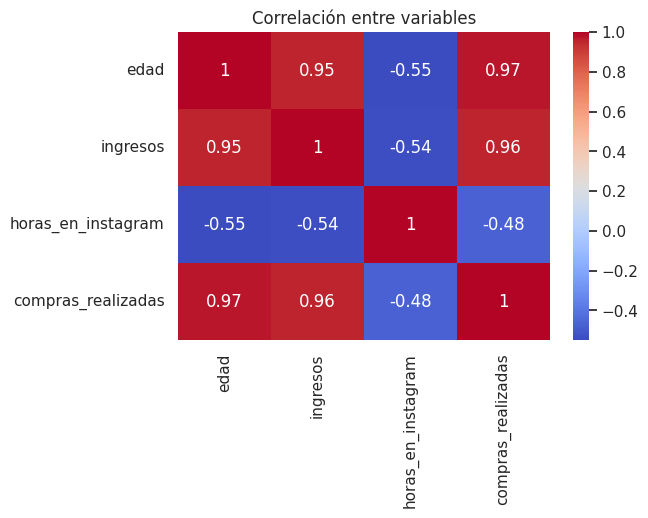

In [3]:
# Matriz de correlación
plt.figure(figsize=(6,4))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlación entre variables')
plt.show()


In [4]:
# Variables independientes y dependiente
X = data[['edad', 'ingresos', 'horas_en_instagram']]
y = data['compras_realizadas']

# Agregar constante
X = sm.add_constant(X)

# Ajustar modelo
modelo = sm.OLS(y, X).fit()

# Resumen del modelo
print(modelo.summary())


                            OLS Regression Results                            
Dep. Variable:     compras_realizadas   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     48.56
Date:                Wed, 10 Dec 2025   Prob (F-statistic):           0.000133
Time:                        22:20:22   Log-Likelihood:                -9.1573
No. Observations:                  10   AIC:                             26.31
Df Residuals:                       6   BIC:                             27.53
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -9.9520      2

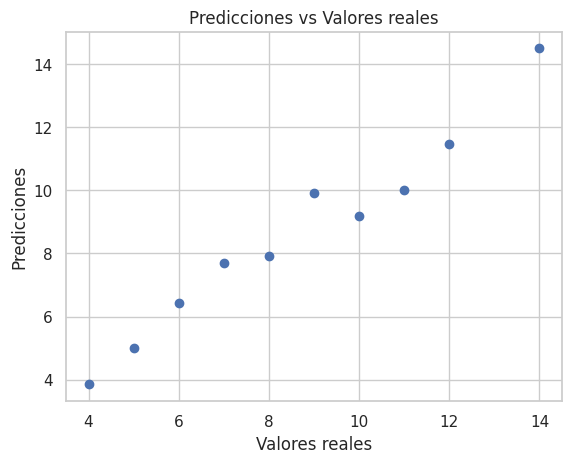

In [5]:
# Predicciones
predicciones = modelo.predict(X)

# Gráfico
plt.scatter(y, predicciones)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores reales')
plt.show()
